In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

### Loading the Dataset

In [2]:
dataset = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [3]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8


#### The IBM HR Employee Attrition dataset provides detailed information about employees working at a fictional company. Each row represents an employee and includes various attributes such as age, daily rate, department, education background, gender, job satisfaction levels, and tenure within the company.

#### One notable feature of this dataset is the presence of an "Attrition" column, which indicates whether the employee has left the company ("Yes") or is still employed ("No"). This makes the dataset particularly useful for studying factors contributing to employee attrition and retention.

#### Other key attributes include Business Travel frequency, Distance From Home, Education Field, Environment Satisfaction, Performance Rating, Relationship Satisfaction, Stock Option Level, Total Working Years, Training Times Last Year, Work-Life Balance, Years at Company, Years in Current Role, Years Since Last Promotion, and Years With Current Manager.

#### Analyzing this dataset could help HR professionals and organizational leaders gain insights into patterns of employee turnover and identify factors that contribute to employee retention or attrition.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [7]:
dataset.shape

(1470, 31)

#### Analysis for Missing Values

In [8]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

###### This dataset has no null or missing Values

In [9]:
dataset.duplicated().sum()

0

### Removing Unnessecery Columns/Features

When preparing data for machine learning algorithms, it's essential to remove columns that are not informative or redundant, as they can negatively impact model performance or introduce noise.

In [10]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

From the list of columns you provided, here are some columns that could potentially be removed during preprocessing:

##### DailyRate, HourlyRate, MonthlyIncome, MonthlyRate: 
These columns contain salary-related information, which might not be directly related to attrition prediction and could introduce bias. However, you might want to keep one of these columns if you're interested in analyzing the relationship between salary and attrition.
##### JobRole, JobLevel: 
These columns might contain redundant information since job role and job level could be correlated. You might choose to keep one of these columns.
##### MaritalStatus: 
While marital status could potentially influence attrition, it might not be directly related to job satisfaction or performance. Depending on the context, you might choose to keep or remove this column.
##### NumCompaniesWorked: 
This column might be relevant as it indicates the number of companies the employee has worked for previously, which could affect their likelihood of leaving the current company.
##### OverTime: 
Indicates whether the employee works overtime or not, which could be a significant factor in predicting attrition.
##### YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: 
These columns contain tenure-related information, which could be relevant for predicting attrition.

In [11]:
drop_columns = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'JobLevel']

In [12]:
dataset.drop(drop_columns,inplace=True,axis=1)

In [13]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,High,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,Medium,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,Medium,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,High,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,College,Medical,High,Male,Very High,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,Below College,Medical,Very High,Male,Medium,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,Bachelor,Life Sciences,Medium,Male,Very High,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,Bachelor,Medical,Very High,Male,Medium,...,Excellent,Very High,0,17,3,Good,9,6,0,8


### Encoding 

Encoding in machine learning refers to the process of converting categorical data into a numerical format that can be used for model training.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
cols_to_encode = []
for i in dataset.columns:
    #print('\n\n',i,'\n\n', type(dataset[i][0]))
    if type(dataset[i][0]) == str:
        cols_to_encode.append(i)

In [16]:
cols_to_encode

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [17]:
for i in cols_to_encode:
    dataset[i] = le.fit_transform(dataset[i])

In [18]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,0,...,0,1,0,8,0,0,6,4,0,5
1,49,0,1,1,8,1,1,0,1,2,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1,2,2,4,3,1,2,...,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1,3,4,1,3,0,0,...,0,0,0,8,3,2,8,7,3,0
4,27,0,2,1,2,1,3,1,1,0,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,1,23,2,3,0,1,3,...,0,0,1,17,3,2,5,2,0,3
1466,39,0,2,1,6,1,3,3,1,2,...,0,1,1,9,5,2,7,7,1,7
1467,27,0,2,1,4,0,1,2,1,3,...,1,2,1,6,0,2,6,2,0,3
1468,49,0,1,2,2,0,3,3,1,2,...,0,3,0,17,3,3,9,6,0,8


In [19]:
y = dataset['Attrition']

dataset.drop(['Attrition'],axis=1,inplace=True)

X = dataset

### Feature Scaling

Perform feature scaling to ensure that all features have the same scale. Common techniques include standardization (scaling features to have mean 0 and standard deviation 1) and min-max scaling (scaling features to a range between 0 and 1). This can help improve the convergence of some machine learning algorithms, especially those based on distances or gradients.

In [20]:
# from sklearn.preprocessing import StandardScaler

# # Standardization
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [21]:
# X = pd.DataFrame(X, columns=dataset.columns)
# X

In [22]:
# from sklearn.decomposition import PCA

# n_components = 25
# pca = PCA(n_components=n_components)

# X = pca.fit_transform(X)

# # Optionally, you can also access the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

In [23]:
# X = pd.DataFrame(X, columns=dataset.columns)
# X

In [24]:
# sorted_columns = [col for _, col in sorted(zip(explained_variance_ratio, X.columns), reverse=True)]

# num_top_features = 20

# top_features = sorted_columns[:num_top_features]

# print("Top", num_top_features, "important features:")
# print(top_features)

In [25]:
# print(X.columns)

In [26]:
# for i in X.columns:
#     if i not in top_features:
#         X.drop(i,axis=1,inplace=True)

### Train and Test Data Split

In machine learning, it's essential to split your dataset into separate training and testing sets to evaluate the performance of your model accurately. The training set is used to train the model, while the testing set is used to assess how well the model generalizes to unseen data. 

In [27]:
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,1,2,0,0,7,...,0,1,0,8,0,0,6,4,0,5
1,49,1,1,8,1,1,0,1,2,6,...,1,3,1,10,3,2,10,7,1,7
2,37,2,1,2,2,4,3,1,2,2,...,0,2,0,7,3,2,0,0,0,0
3,33,1,1,3,4,1,3,0,0,6,...,0,0,0,8,3,2,8,7,3,0
4,27,2,1,2,1,3,1,1,0,2,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,23,2,3,0,1,3,2,...,0,0,1,17,3,2,5,2,0,3
1466,39,2,1,6,1,3,3,1,2,0,...,0,1,1,9,5,2,7,7,1,7
1467,27,2,1,4,0,1,2,1,3,4,...,1,2,1,6,0,2,6,2,0,3
1468,49,1,2,2,0,3,3,1,2,7,...,0,3,0,17,3,3,9,6,0,8


In [28]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1176, 25) (1176,)
Testing set shape: (294, 25) (294,)


## Graphical Analysis

In [30]:
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,1,2,0,0,7,...,0,1,0,8,0,0,6,4,0,5
1,49,1,1,8,1,1,0,1,2,6,...,1,3,1,10,3,2,10,7,1,7
2,37,2,1,2,2,4,3,1,2,2,...,0,2,0,7,3,2,0,0,0,0
3,33,1,1,3,4,1,3,0,0,6,...,0,0,0,8,3,2,8,7,3,0
4,27,2,1,2,1,3,1,1,0,2,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,23,2,3,0,1,3,2,...,0,0,1,17,3,2,5,2,0,3
1466,39,2,1,6,1,3,3,1,2,0,...,0,1,1,9,5,2,7,7,1,7
1467,27,2,1,4,0,1,2,1,3,4,...,1,2,1,6,0,2,6,2,0,3
1468,49,1,2,2,0,3,3,1,2,7,...,0,3,0,17,3,3,9,6,0,8


(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

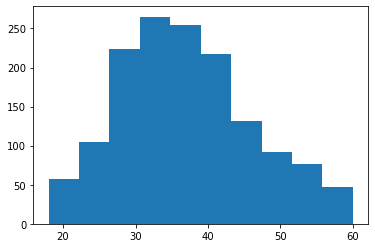

In [31]:
plt.hist(X['Age'],bins=10)

(array([165., 357., 437., 155., 119., 107.,  53.,  40.,  24.,  13.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

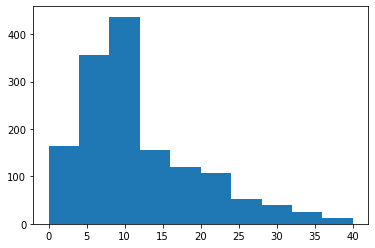

In [32]:
plt.hist(X['TotalWorkingYears'],bins=10)

(array([408., 209., 302.,  78.,  82., 165.,  55., 104.,  28.,  39.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <BarContainer object of 10 artists>)

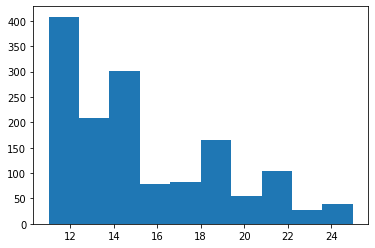

In [33]:
plt.hist(X['PercentSalaryHike'],bins=10)

<AxesSubplot:>

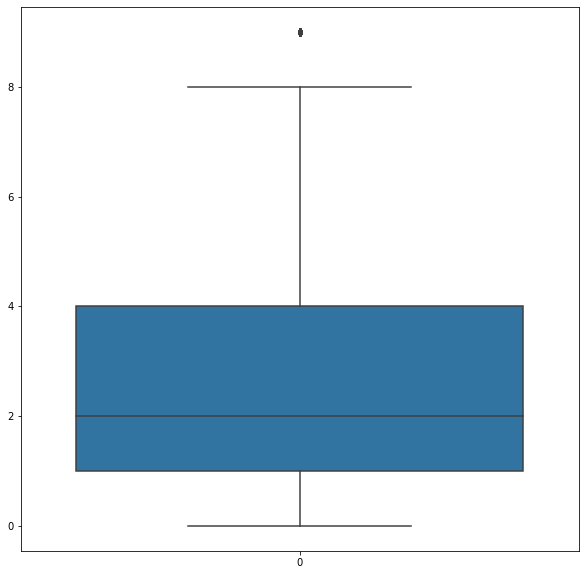

In [34]:
figure = plt.figure(figsize=(10,10))
sns.boxplot(data=X['NumCompaniesWorked'])

In [35]:
# figure = plt.figure(figsize=(6,6))

# sns.pairplot(data=X)

<AxesSubplot:>

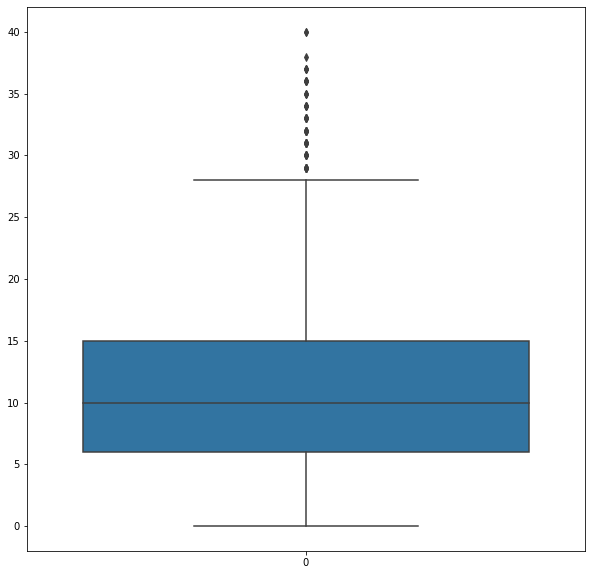

In [36]:
figure = plt.figure(figsize=(10,10))
sns.boxplot(data=X['TotalWorkingYears'])

<AxesSubplot:>

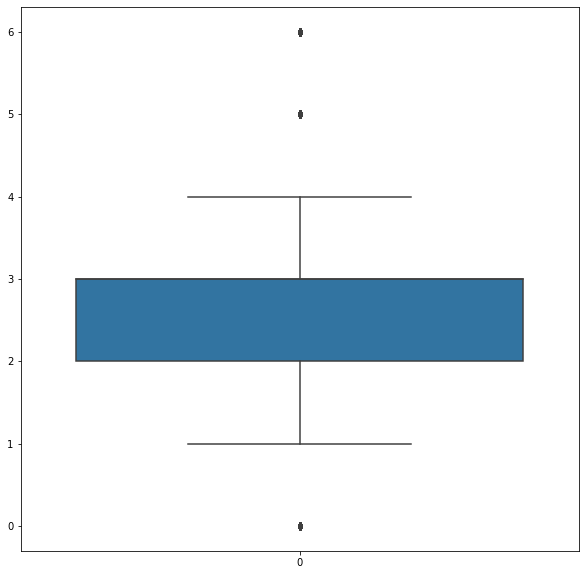

In [37]:
figure = plt.figure(figsize=(10,10))
sns.boxplot(data=X['TrainingTimesLastYear'])

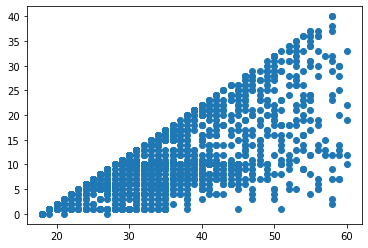

In [38]:
plt.scatter(X['Age'],X['TotalWorkingYears'])

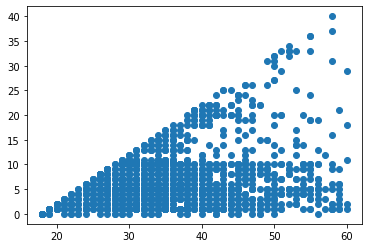

In [39]:
plt.scatter(X['Age'],X['YearsAtCompany'])

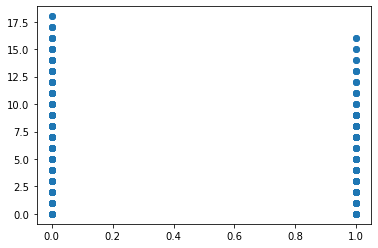

In [40]:
plt.scatter(X['PerformanceRating'],X['YearsInCurrentRole'])

Text(0.5, 1.0, 'Gender Distribution')

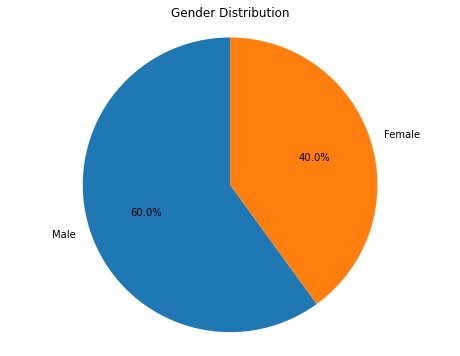

In [41]:
gender_counts = X['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(x=gender_counts, labels=['Male','Female'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')

<AxesSubplot:>

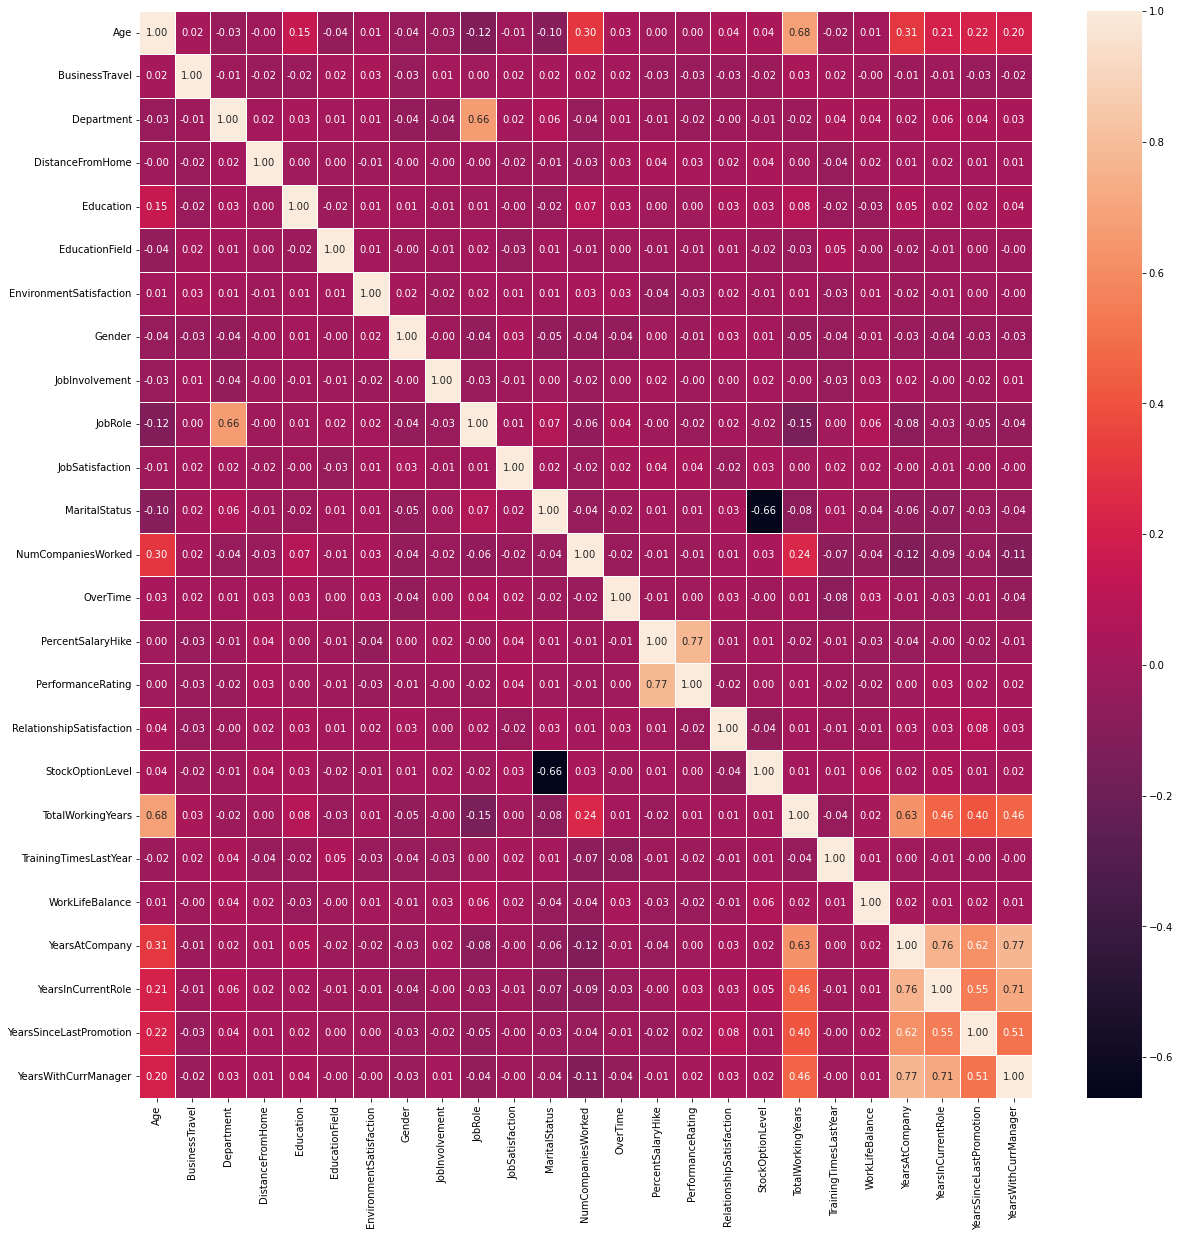

In [42]:
corrData = X.corr()

plt.figure(figsize=(20,20))
sns.heatmap(data=corrData,annot=True,linewidths=0.5,fmt=".2f")

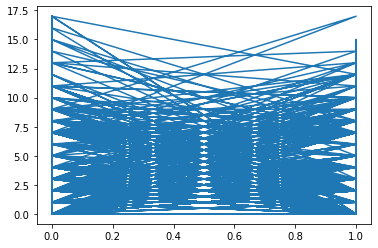

In [43]:
plt.plot(X['OverTime'],X['YearsWithCurrManager'])

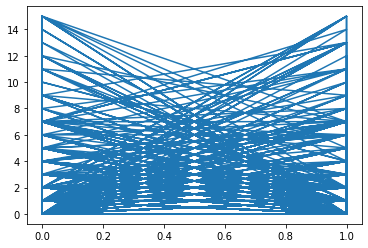

In [44]:
plt.plot(X['OverTime'],X['YearsSinceLastPromotion'])

C:\Users\Dhruv Goel\AppData\Local\Temp\ipykernel_15016\768906966.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X[numerical_features].hist(bins=25, ax=ax, log=True);


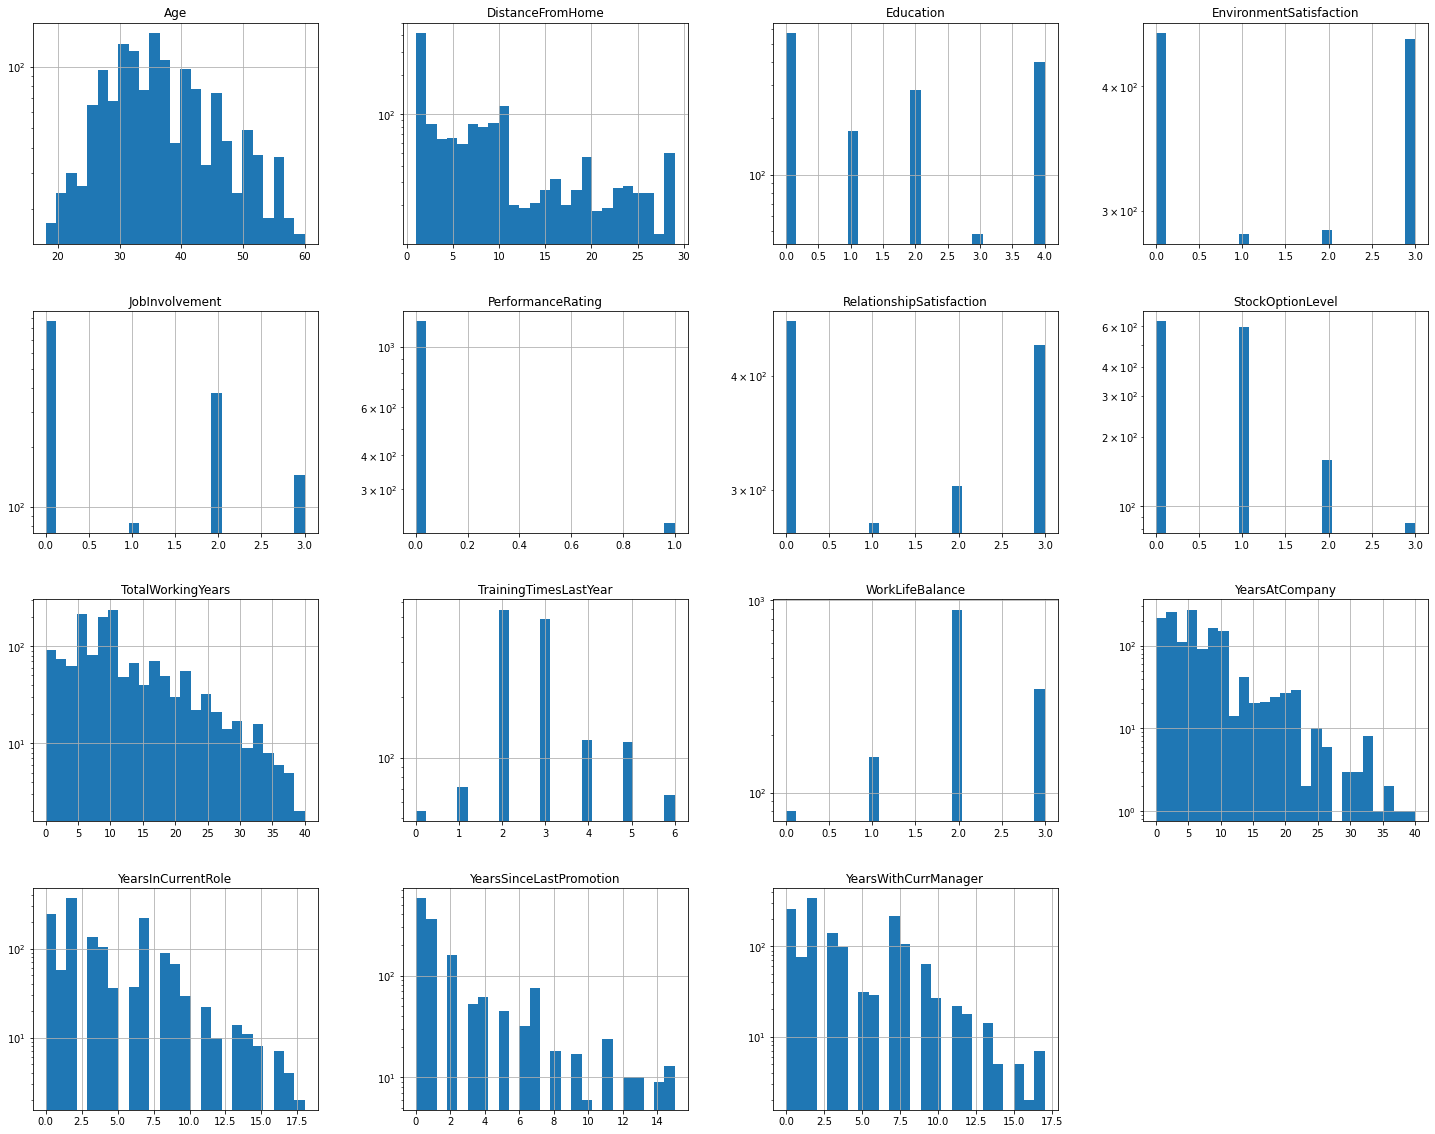

In [45]:
numerical_features = [
    'Age',
    'DistanceFromHome',
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

fig = plt.figure(figsize=(25,20))
ax = fig.gca()

X[numerical_features].hist(bins=25, ax=ax, log=True);

### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(1176, 25) (1176,) (294, 25) (294,)


In [48]:
accuracy_list = []
algo = []

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [50]:
pred = np.clip(np.round(pred), 0, 1)

pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

print("Error (MAE) : ", mean_absolute_error(test_y,pred)*100)
print("Error (MSE) : ", root_mean_squared_error(test_y,pred)*100)

print("R2 Score  : ",r2_score(test_y,pred)*100)

Error (MAE) :  12.585034013605442
Error (MSE) :  35.475391489884146
R2 Score  :  -9.38159879336351


In [52]:
threshold = 0.5

binary_predictions = np.where(pred > threshold, 1, 0)

accuracy = np.mean(binary_predictions == y_test)

print("Accuracy:", accuracy*100)

accuracy_list.append(accuracy*100)
algo.append("Linear Regression")

Accuracy: 87.41496598639455


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_x,train_y)

pred = model.predict(test_x)

C:\Users\Dhruv Goel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("Logistic Regression")

Accuracy :  86.39455782312925
Precision :  46.666666666666664
Recall :  17.94871794871795
F1-Score :  25.925925925925924
Classification Report :                precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.47      0.18      0.26        39

    accuracy                           0.86       294
   macro avg       0.68      0.57      0.59       294
weighted avg       0.83      0.86      0.84       294



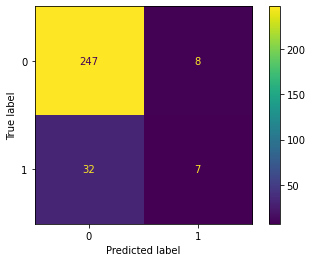

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [58]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("KNN")

Accuracy :  85.71428571428571
Precision :  38.46153846153847
Recall :  12.82051282051282
F1-Score :  19.230769230769234
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.38      0.13      0.19        39

    accuracy                           0.86       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.81      0.86      0.82       294



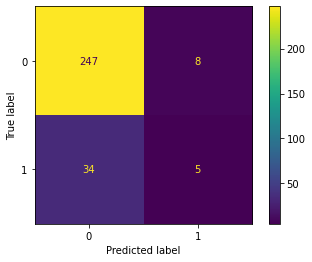

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# K-Means Clustering

In [61]:
from sklearn.cluster import KMeans

model = KMeans()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [62]:
threshold = np.mean(pred)

pred = np.where(pred >= threshold, 1, 0)
pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("K Means")

Accuracy :  58.50340136054422
Precision :  19.708029197080293
Recall :  69.23076923076923
F1-Score :  30.681818181818183
Classification Report :                precision    recall  f1-score   support

           0       0.92      0.57      0.70       255
           1       0.20      0.69      0.31        39

    accuracy                           0.59       294
   macro avg       0.56      0.63      0.51       294
weighted avg       0.83      0.59      0.65       294



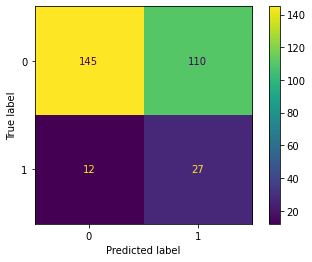

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [66]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("Naive Bayes")

Accuracy :  84.01360544217688
Precision :  40.0
Recall :  41.02564102564102
F1-Score :  40.50632911392405
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.40      0.41      0.41        39

    accuracy                           0.84       294
   macro avg       0.65      0.66      0.66       294
weighted avg       0.84      0.84      0.84       294



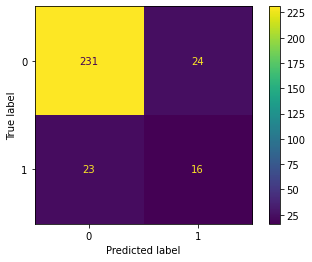

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# Desicion Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [70]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("Desicion Tree")

Accuracy :  75.51020408163265
Precision :  24.615384615384617
Recall :  41.02564102564102
F1-Score :  30.76923076923077
Classification Report :                precision    recall  f1-score   support

           0       0.90      0.81      0.85       255
           1       0.25      0.41      0.31        39

    accuracy                           0.76       294
   macro avg       0.57      0.61      0.58       294
weighted avg       0.81      0.76      0.78       294



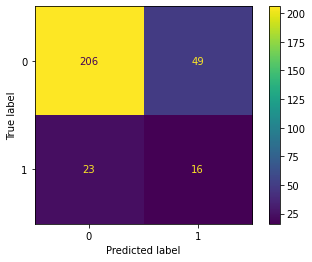

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# SVM

In [73]:
from sklearn.svm import SVC

model = SVC()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [74]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("SVM")

Accuracy :  86.73469387755102
Precision :  0.0
Recall :  0.0
F1-Score :  0.0
Classification Report :                precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\Dhruv Goel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dhruv Goel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dhruv Goel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dhruv Goel\anaconda3\lib

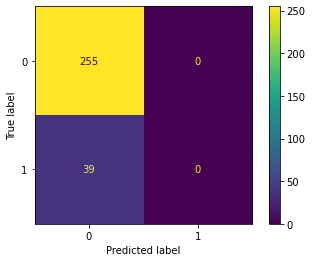

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(train_x,train_y)

pred = model.predict(test_x)

In [78]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Accuracy : ", accuracy_score(test_y,pred)*100)
print("Precision : ",precision_score(test_y,pred)*100)
print("Recall : ",recall_score(test_y,pred)*100)
print("F1-Score : ",f1_score(test_y,pred)*100)
print("Classification Report : ", classification_report(test_y,pred))

accuracy_list.append(accuracy_score(test_y,pred)*100)
algo.append("Random Forest")

Accuracy :  87.07482993197279
Precision :  54.54545454545454
Recall :  15.384615384615385
F1-Score :  24.0
Classification Report :                precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.55      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.84      0.87      0.84       294



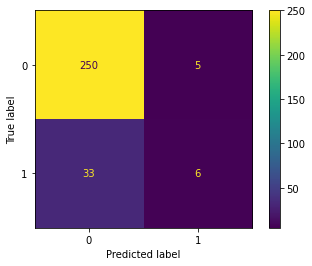

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, pred))
disp.plot()
plt.show()

## Accuracy Comparison

In [81]:
accuracy_list

[87.41496598639455,
 86.39455782312925,
 85.71428571428571,
 58.50340136054422,
 84.01360544217688,
 75.51020408163265,
 86.73469387755102,
 87.07482993197279]

In [82]:
algo

['Linear Regression',
 'Logistic Regression',
 'KNN',
 'K Means',
 'Naive Bayes',
 'Desicion Tree',
 'SVM',
 'Random Forest']

<AxesSubplot:>

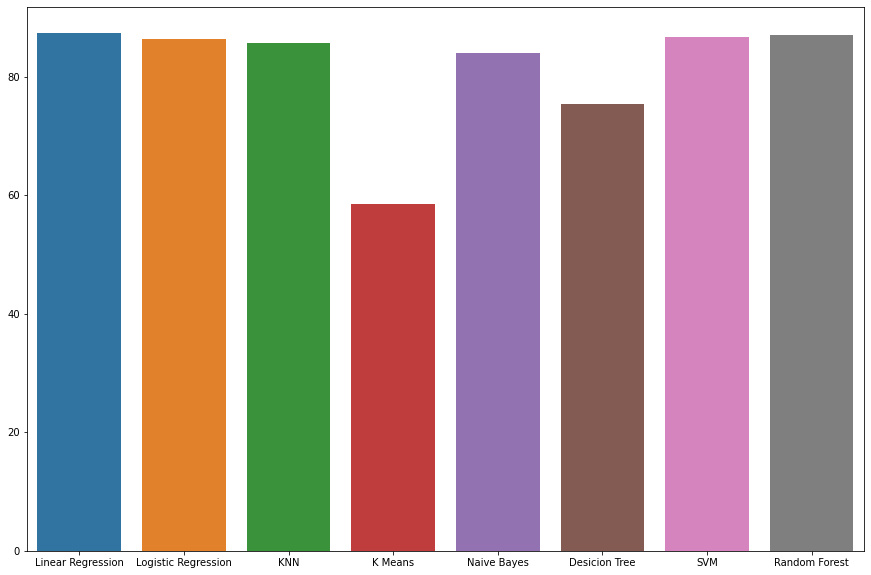

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x = algo,y=accuracy_list,alpha = 1)

In [84]:
max_ind = np.argmax(accuracy_list)

In [85]:
print(f'Algorithm with highest Accuracy of {accuracy_list[max_ind]} is {algo[max_ind]}')

Algorithm with highest Accuracy of 87.41496598639455 is Linear Regression


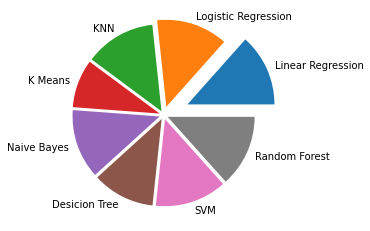

In [86]:
plt.pie(accuracy_list,labels=algo,explode = [0.3,0.1,0.05,0.05,0.05,0.05,0.05,0.05])
plt.show()